<h1> <center> STT Engine Selection </center></h1>

<h2> Features </h2>

In [5]:
import glob
import os
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
import tensorflow as tf
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
import pandas as pd
from collections import defaultdict
%matplotlib inline

<h2> Data Collection </h2>

In [3]:
# The sound files of the corresponding paths are loaded
def load_sound_files(file_paths):
    raw_sounds = []
    for fp in file_paths:
        X,sr = librosa.load('/Users/shanraja/Desktop/projects/STT_Engine_Selection/audios/clear/'+fp)
        raw_sounds.append(X)
    return raw_sounds
def len_file(raw_sounds):
    return len(raw_sounds)
# The wave plot of the signals along with the name 
def plot_waves(sound_names,raw_sounds):
    plt.plot(raw_sounds)
    plt.title(sound_names)
    plt.show()
# The specctrogram of the signal is displayed    
def plot_specgram(sound_names,raw_sounds):
    specgram(np.array(raw_sounds), Fs=22050)
    plt.title(sound_names)
    plt.show()

def plot_log_power_specgram(sound_names,raw_sounds):
    D = librosa.logamplitude(np.abs(librosa.stft(raw_sounds))**2, ref_power=np.max)
    librosa.display.specshow(D,x_axis='time' ,y_axis='log')
    plt.title(sound_names)
    plt.show()




In [6]:
csv_names=['output_test_1.csv']
#csv_names=['mic1_output_test3.csv','mic1_output_test4.csv','mic1_output_test5.csv','mic2_output_test3.csv','mic2_output_test4.csv','mic2_output_test5.csv','output_test_1.csv','output_test_2.csv','output_test_3.csv','output_test_4.csv','output_test_5.csv']
#audio_names=['test3_mic1','test4_mic1','test5_mic1','test3_mic2','test4_mic2','test5_mic2','001','002','003','004','005']
audio_names=['001']

In [7]:
len(audio_names)

1

In [8]:
dir_name = defaultdict(list)
for i, j in zip(csv_names,audio_names):
    dir_name[i].append(str(j))

In [9]:
dir_name[csv_names[0]]


['001']

In [16]:
fin_features= np.zeros((0,194))
fin_labels=np.empty((0,7))

In [11]:
# Attempt 2
#fin_features= np.zeros((0,8318))
#fin_labels=np.empty((0,7))

In [17]:
for names in csv_names:
    df=pd.read_csv('/Users/shanraja/Desktop/projects/STT_Engine_Selection/audios/clear/'+names)
    print(names)
    for i in range(3,16,2):
        print(df[df.columns[i]].fillna(1,inplace=True))
    a=np.zeros([7,df.shape[0]])
    j=0
    name=['Wer_google','Wer_ibm','Wer_bing','Wer_houndify','Wer_nuance','Wer_deepspeech','Wer_wit']
    for i in range(2,15,2):
        print(j)
        a[j]=df[df.columns[i]].isnull()*1
        df[name[j]]=df[df.columns[(i+1)]]
        j+=1
    #m=[]
    #x=[]
    #m=df.columns[-7:].tolist()
    #for i in reversed(m):
    #    x.append(i)
    df['min']=df[df.columns[-7:]].idxmin(axis=1)
    features= np.empty((0,194))
    labels=np.empty((0,7))
    for i in df['FileName']:

        mfccs, chroma, mel, contrast,tonnetz,length = extract_feature('/Users/shanraja/Desktop/projects/STT_Engine_Selection/audios/clear/'+dir_name[names][0]+'/'+i)
        ext_features = np.hstack([mfccs,chroma,mel,contrast,tonnetz,length])
        features = np.vstack([features,ext_features])
    labels=pd.get_dummies(df['min'])
    print
    if labels.shape[1]<7:
        result = np.zeros((features.shape[0],7))
        result[:labels.shape[0],:labels.shape[1]] = labels
        print(result)
        labels=result
    
    fin_features=np.vstack([fin_features,features])
    fin_labels=np.vstack([fin_labels,labels])

output_test_1.csv
None
None
None
None
None
None
None
0
1
2
3
4
5
6


/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/resampy/core.py:90: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(x.dtype, np.float):
/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1725: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(x.dtype, float) or np.issubdtype(x.dtype, complex):
/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1640: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(dtype, float):
/Users/shanraja/anacon

/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1725: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(x.dtype, float) or np.issubdtype(x.dtype, complex):
/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1640: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(dtype, float):
/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1725: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  if np.issubdtype(x.dtype, float) or np.is

/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1640: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(dtype, float):
/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1725: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  if np.issubdtype(x.dtype, float) or np.issubdtype(x.dtype, complex):
/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/resampy/core.py:90: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(x.dtype, np.float):
/Users/s

/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/resampy/core.py:90: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(x.dtype, np.float):
/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1725: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(x.dtype, float) or np.issubdtype(x.dtype, complex):
/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1640: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(dtype, float):
/Users/shanraja/anacon

/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1725: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(x.dtype, float) or np.issubdtype(x.dtype, complex):
/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1640: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(dtype, float):
/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1725: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  if np.issubdtype(x.dtype, float) or np.is

/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1640: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(dtype, float):
/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1725: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  if np.issubdtype(x.dtype, float) or np.issubdtype(x.dtype, complex):
/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/resampy/core.py:90: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(x.dtype, np.float):
/Users/s

/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/resampy/core.py:90: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(x.dtype, np.float):
/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1725: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(x.dtype, float) or np.issubdtype(x.dtype, complex):
/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1640: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(dtype, float):
/Users/shanraja/anacon

/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1725: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(x.dtype, float) or np.issubdtype(x.dtype, complex):
/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1640: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(dtype, float):
/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1725: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  if np.issubdtype(x.dtype, float) or np.is

/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1640: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(dtype, float):
/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1725: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  if np.issubdtype(x.dtype, float) or np.issubdtype(x.dtype, complex):
/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/resampy/core.py:90: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(x.dtype, np.float):
/Users/s

/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/resampy/core.py:90: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(x.dtype, np.float):
/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1725: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(x.dtype, float) or np.issubdtype(x.dtype, complex):
/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1640: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(dtype, float):
/Users/shanraja/anacon

/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1725: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(x.dtype, float) or np.issubdtype(x.dtype, complex):
/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1640: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(dtype, float):
/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1725: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  if np.issubdtype(x.dtype, float) or np.is

/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1640: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(dtype, float):
/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1725: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  if np.issubdtype(x.dtype, float) or np.issubdtype(x.dtype, complex):
/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/resampy/core.py:90: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(x.dtype, np.float):
/Users/s

/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/resampy/core.py:90: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(x.dtype, np.float):
/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1725: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(x.dtype, float) or np.issubdtype(x.dtype, complex):
/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1640: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(dtype, float):
/Users/shanraja/anacon

/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1725: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(x.dtype, float) or np.issubdtype(x.dtype, complex):
/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1640: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(dtype, float):
/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1725: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  if np.issubdtype(x.dtype, float) or np.is

/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1640: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(dtype, float):
/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1725: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  if np.issubdtype(x.dtype, float) or np.issubdtype(x.dtype, complex):
/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/resampy/core.py:90: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(x.dtype, np.float):
/Users/s

/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1725: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(x.dtype, float) or np.issubdtype(x.dtype, complex):
/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1640: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(dtype, float):
/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1725: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  if np.issubdtype(x.dtype, float) or np.is

/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1640: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(dtype, float):
/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1725: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  if np.issubdtype(x.dtype, float) or np.issubdtype(x.dtype, complex):
/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/resampy/core.py:90: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(x.dtype, np.float):
/Users/s

/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/resampy/core.py:90: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(x.dtype, np.float):
/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1725: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(x.dtype, float) or np.issubdtype(x.dtype, complex):
/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1640: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(dtype, float):
/Users/shanraja/anacon

/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1725: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(x.dtype, float) or np.issubdtype(x.dtype, complex):
/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1640: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(dtype, float):
/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1725: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  if np.issubdtype(x.dtype, float) or np.is

/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1640: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(dtype, float):
/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1725: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  if np.issubdtype(x.dtype, float) or np.issubdtype(x.dtype, complex):
/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/resampy/core.py:90: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(x.dtype, np.float):
/Users/s

/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/resampy/core.py:90: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(x.dtype, np.float):
/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1725: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(x.dtype, float) or np.issubdtype(x.dtype, complex):
/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1640: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(dtype, float):
/Users/shanraja/anacon

/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1640: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(dtype, float):
/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1725: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  if np.issubdtype(x.dtype, float) or np.issubdtype(x.dtype, complex):
/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/resampy/core.py:90: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(x.dtype, np.float):
/Users/s

/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/resampy/core.py:90: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(x.dtype, np.float):
/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1725: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(x.dtype, float) or np.issubdtype(x.dtype, complex):
/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1640: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(dtype, float):
/Users/shanraja/anacon

/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1725: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(x.dtype, float) or np.issubdtype(x.dtype, complex):
/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1640: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(dtype, float):
/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1725: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  if np.issubdtype(x.dtype, float) or np.is

/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1640: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(dtype, float):
/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1725: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  if np.issubdtype(x.dtype, float) or np.issubdtype(x.dtype, complex):
/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/resampy/core.py:90: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(x.dtype, np.float):
/Users/s

/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/resampy/core.py:90: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(x.dtype, np.float):
/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1725: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(x.dtype, float) or np.issubdtype(x.dtype, complex):
/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1640: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(dtype, float):
/Users/shanraja/anacon

/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1725: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(x.dtype, float) or np.issubdtype(x.dtype, complex):
/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1640: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(dtype, float):
/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1725: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  if np.issubdtype(x.dtype, float) or np.is

/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1640: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(dtype, float):
/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1725: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  if np.issubdtype(x.dtype, float) or np.issubdtype(x.dtype, complex):
/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/resampy/core.py:90: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(x.dtype, np.float):
/Users/s

/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1725: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  if np.issubdtype(x.dtype, float) or np.issubdtype(x.dtype, complex):
/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/resampy/core.py:90: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(x.dtype, np.float):
/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1725: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(x.dtype, float) or np.issub

/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/resampy/core.py:90: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(x.dtype, np.float):
/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1725: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(x.dtype, float) or np.issubdtype(x.dtype, complex):
/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1640: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(dtype, float):
/Users/shanraja/anacon

/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1725: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(x.dtype, float) or np.issubdtype(x.dtype, complex):
/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1640: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(dtype, float):
/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1725: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  if np.issubdtype(x.dtype, float) or np.is

/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1640: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(dtype, float):
/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1725: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  if np.issubdtype(x.dtype, float) or np.issubdtype(x.dtype, complex):
/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/resampy/core.py:90: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(x.dtype, np.float):
/Users/s

/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/resampy/core.py:90: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(x.dtype, np.float):
/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1725: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(x.dtype, float) or np.issubdtype(x.dtype, complex):
/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1640: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(dtype, float):
/Users/shanraja/anacon

/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1725: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(x.dtype, float) or np.issubdtype(x.dtype, complex):
/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1640: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(dtype, float):
/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1725: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  if np.issubdtype(x.dtype, float) or np.is

/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1640: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(dtype, float):
/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1725: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  if np.issubdtype(x.dtype, float) or np.issubdtype(x.dtype, complex):
/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/resampy/core.py:90: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(x.dtype, np.float):
/Users/s

/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1725: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(x.dtype, float) or np.issubdtype(x.dtype, complex):
/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1640: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(dtype, float):
/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1725: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  if np.issubdtype(x.dtype, float) or np.is

/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1640: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(dtype, float):
/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1725: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  if np.issubdtype(x.dtype, float) or np.issubdtype(x.dtype, complex):
/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/resampy/core.py:90: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(x.dtype, np.float):
/Users/s

/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/resampy/core.py:90: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(x.dtype, np.float):
/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1725: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(x.dtype, float) or np.issubdtype(x.dtype, complex):
/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1640: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(dtype, float):
/Users/shanraja/anacon

/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1725: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(x.dtype, float) or np.issubdtype(x.dtype, complex):
/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1640: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(dtype, float):
/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1725: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  if np.issubdtype(x.dtype, float) or np.is

/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1640: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(dtype, float):
/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1725: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  if np.issubdtype(x.dtype, float) or np.issubdtype(x.dtype, complex):
/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/resampy/core.py:90: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(x.dtype, np.float):
/Users/s

/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/resampy/core.py:90: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(x.dtype, np.float):
/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1725: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(x.dtype, float) or np.issubdtype(x.dtype, complex):
/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1640: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(dtype, float):
/Users/shanraja/anacon

/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1725: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(x.dtype, float) or np.issubdtype(x.dtype, complex):
/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1640: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(dtype, float):
/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1725: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  if np.issubdtype(x.dtype, float) or np.is

/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1640: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(dtype, float):
/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1725: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  if np.issubdtype(x.dtype, float) or np.issubdtype(x.dtype, complex):
/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/resampy/core.py:90: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(x.dtype, np.float):
/Users/s

/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/resampy/core.py:90: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(x.dtype, np.float):
/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1725: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(x.dtype, float) or np.issubdtype(x.dtype, complex):
/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1640: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(dtype, float):
/Users/shanraja/anacon

/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1725: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(x.dtype, float) or np.issubdtype(x.dtype, complex):
/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1640: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(dtype, float):
/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1725: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  if np.issubdtype(x.dtype, float) or np.is

In [18]:
fin_features.shape

(280, 194)

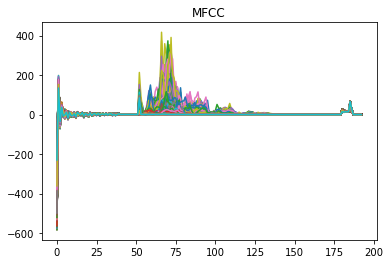

In [763]:
for i in range(1000):
    plt.plot(fin_features[i])
    plt.title('MFCC')
plt.show()    


In [19]:
fin_features.shape

(280, 194)

In [20]:
fin_labels.shape

(280, 7)

In [21]:
fin_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [716]:
# labels 
df=pd.read_csv('/Users/shanraja/Desktop/projects/STT_Engine_Selection/audios/clear/output_test_5.csv')

In [717]:
df.head(30)

,FileName,Text,Google,WER,IBM,WER.1,BING,WER.2,Houndify,WER.3,Nuance,WER.4,DeepSpeech,WER.5,WIT,WER.6
0,PDAs05_001_1.wav,IN THE NINETEEN EIGHTY FIVE QUARTER THE OWNER ...,IN THE 1985 QUARTER THE OWNER AND OPERATOR OF ...,0.42308,IN THE NINETEEN EIGHTY FIVE QUARTER THE OWNER ...,0.03846,IN THE 1985 QUARTER THE OWNER AND OPERATOR OF ...,0.38462,IN THE NINETEEN EIGHTY FIVE QUARTER THE OWNER ...,0.03846,IN THE 1985 QUARTER THE OWNER AND OPERATOR OF ...,0.42308,IN THE NINETEEN EIGHTY FIVE QUARTER THE OWNER ...,0.15385,IN THE NINETEEN EIGHTY FIVE QUARTER THE OWNER ...,0.03846
1,PDAs05_001_2.wav,IN THE NINETEEN EIGHTY FIVE QUARTER THE OWNER ...,IN THE 1985 QUARTER THE OWNER AND OPERATOR OF ...,0.38462,IN THE NINETEEN EIGHTY FIVE QUARTER THE OWNER ...,0.03846,IN THE 1985 QUARTER THE OWNER AND OPERATOR OF ...,0.38462,IN THE NINETEEN EIGHTY FIVE QUARTER THE OWNER ...,0.03846,IN THE 1985 QUARTER THE OWNER AND OPERATOR OF ...,0.42308,IN THE NINETEEN EIGHTY FIVE QUARTER THE OWNER ...,0.07692,IN THE NINETEEN EIGHTY FIVE QUARTER THE OWNER ...,0.07692
2,PDAs05_002_1.wav,IT HAD FORECAST A NINETEEN EIGHTY SIX FOURTH Q...,1986 FOURTH QUARTER LOSS OF 18 MILLION DOLLARS...,0.52632,IT HAD FORECAST IN NINETEEN EIGHTY SIX FOURTH ...,0.05263,IT HAD FORECAST IN 1986 FOURTH QUARTER LOSS OF...,0.47368,IT HAD FORECAST IN NINETEEN EIGHTY SIX FOURTH ...,0.05263,IT HAD FORECAST IN 1986 FOURTH-QUARTER LOSS OF...,0.68421,IT HAD FORECAST AND NINETEEN EIGHTY SIX FOURTH...,0.05263,IT HAD FOR CASH AND NINETEEN EIGHTY SIX FOURTH...,0.15789
3,PDAs05_002_2.wav,IT HAD FORECAST A NINETEEN EIGHTY SIX FOURTH Q...,IT HAD FORECAST A 1986 FOURTH QUARTER LOSS OF ...,0.31579,IT HAD FORECAST IN NINETEEN EIGHTY SIX FOURTH ...,0.05263,IT HAD FORECAST IN 1986 FOURTH QUARTER LOSS OF...,0.47368,IT HAD FORECAST IN NINETEEN EIGHTY SIX FOURTH ...,0.05263,IT HAD FORECAST IN 1986 FOURTH-QUARTER LOSS OF...,0.68421,IT HAD FORECAST AND NINETEEN EIGHTY SIX FOURTH...,0.05263,IT HAD FORECAST A 1986 FOURTH QUARTER LOSS OF ...,0.31579
4,PDAs05_003_1.wav,REVENUE IN THE QUARTER MORE THAN DOUBLED TO TH...,REVENUE IN THE QUARTER WORTHING DOUBLED TO 360...,0.56000,REVENUE IN THE QUARTER MORE THAN DOUBLED TO TH...,0.00000,REVENUE IN THE QUARTER MORE THAN DOUBLED 2362 ...,0.56000,REVENUE IN THE QUARTER MORE THAN DOUBLED TO TH...,0.00000,REVENUE IN THE QUARTER MORE THAN DOUBLED TO $3...,0.56000,REGINE IN THE PORTER MORE THAN DELL TO THREE H...,0.28000,REVENUE IN THE QUARTER MORE THAN DOUBLED TO 36...,0.48000
5,PDAs05_003_2.wav,REVENUE IN THE QUARTER MORE THAN DOUBLED TO TH...,REVENUE IN THE QUARTER MORE THAN DOUBLED TO 36...,0.48000,REVENUE IN THE QUARTER MORE THAN DOUBLED TO TH...,0.00000,REVENUE IN THE QUARTER MORE THAN DOUBLED TO $3...,0.56000,REVENUE IN THE QUARTER MORE THAN DOUBLED TO TH...,0.00000,REVENUE IN THE QUARTER MORE THAN DOUBLED TO $3...,0.56000,REVENUE IN THE QUARTER MORE THAN DOUBLED TO TH...,0.00000,REVENUE IN THE QUARTER MORE THAN DOUBLED TO 36...,0.48000
6,PDAs05_004_1.wav,SEPARATELY NEW YORK STATE SOLD ABOUT SEVENTY S...,SEPARATELY NEW YORK STATE SOLD ABOUT 77.1 MILL...,0.25000,SEPARATELY NEW YORK STATE SOLD ABOUT SEVENTY S...,0.00000,SEPARATELY NEW YORK STATE SOLD ABOUT $77.1 MIL...,0.31250,SEPARATELY NEW YORK STATE SOLD ABOUT SEVENTY S...,0.12500,SEPARATELY NEW YORK STATE SOLD ABOUT $77.1 MIL...,0.31250,EPWUIRCTLY NEW YORK STAPFULDWIBOUT SEVEN OF SE...,0.43750,SEPARATELY NEW YORK STATE SOLD ABOUT 77.1 MILL...,0.25000
7,PDAs05_004_2.wav,SEPARATELY NEW YORK STATE SOLD ABOUT SEVENTY S...,SEPARATELY NEW YORK STATE SOLD ABOUT 77.1 MILL...,0.25000,SEPARATELY NEW YORK STATE SOLD ABOUT SEVENTY S...,0.00000,SEPARATELY NEW YORK STATE SOLD ABOUT $77.1 MIL...,0.31250,SEPARATELY NEW YORK STATE SOLD ABOUT SEVENTY S...,0.00000,SEPARATELY NEW YORK STATE SOLD ABOUT $77.1 MIL...,0.31250,SEPARATELY NEW YORK STATE SOLD ABOUT SEVENTY S...,0.00000,SEPARATELY NEW YORK STATE SOLD ABOUT 77.1 MILL...,0.25000
8,PDAs05_005_1.wav,THE ISSUE WAS PRICED AFTER AUCTION TO YIELD FR...,IT WAS PRICED AFTER OPTION TO

In [718]:
for i in range(3,16,2):
    print(df[df.columns[i]].fillna(1,inplace=True))

None
None
None
None
None
None
None


In [719]:
df.shape[0]

278

In [720]:

a=np.zeros([7,df.shape[0]])
a.shape
j=0
name=['Wer_google','Wer_ibm','Wer_bing','Wer_houndify','Wer_nuance','Wer_deepspeech','Wer_wit']
for i in range(2,15,2):
    print(j)
    a[j]=df[df.columns[i]].isnull()*1
    df[name[j]]=df[df.columns[(i+1)]]
    j+=1




0
1
2
3
4
5
6


In [721]:
m=[]
x=[]
m=df.columns[-7:].tolist()
for i in reversed(m):
    x.append(i)
x

['Wer_wit',
 'Wer_deepspeech',
 'Wer_nuance',
 'Wer_houndify',
 'Wer_bing',
 'Wer_ibm',
 'Wer_google']

In [722]:
df

,FileName,Text,Google,WER,IBM,WER.1,BING,WER.2,Houndify,WER.3,...,WER.5,WIT,WER.6,Wer_google,Wer_ibm,Wer_bing,Wer_houndify,Wer_nuance,Wer_deepspeech,Wer_wit
0,PDAs05_001_1.wav,IN THE NINETEEN EIGHTY FIVE QUARTER THE OWNER ...,IN THE 1985 QUARTER THE OWNER AND OPERATOR OF ...,0.42308,IN THE NINETEEN EIGHTY FIVE QUARTER THE OWNER ...,0.03846,IN THE 1985 QUARTER THE OWNER AND OPERATOR OF ...,0.38462,IN THE NINETEEN EIGHTY FIVE QUARTER THE OWNER ...,0.03846,...,0.15385,IN THE NINETEEN EIGHTY FIVE QUARTER THE OWNER ...,0.03846,0.42308,0.03846,0.38462,0.03846,0.42308,0.15385,0.03846
1,PDAs05_001_2.wav,IN THE NINETEEN EIGHTY FIVE QUARTER THE OWNER ...,IN THE 1985 QUARTER THE OWNER AND OPERATOR OF ...,0.38462,IN THE NINETEEN EIGHTY FIVE QUARTER THE OWNER ...,0.03846,IN THE 1985 QUARTER THE OWNER AND OPERATOR OF ...,0.38462,IN THE NINETEEN EIGHTY FIVE QUARTER THE OWNER ...,0.03846,...,0.07692,IN THE NINETEEN EIGHTY FIVE QUARTER THE OWNER ...,0.07692,0.38462,0.03846,0.38462,0.03846,0.42308,0.07692,0.07692
2,PDAs05_002_1.wav,IT HAD FORECAST A NINETEEN EIGHTY SIX FOURTH Q...,1986 FOURTH QUARTER LOSS OF 18 MILLION DOLLARS...,0.52632,IT HAD FORECAST IN NINETEEN EIGHTY SIX FOURTH ...,0.05263,IT HAD FORECAST IN 1986 FOURTH QUARTER LOSS OF...,0.47368,IT HAD FORECAST IN NINETEEN EIGHTY SIX FOURTH ...,0.05263,...,0.05263,IT HAD FOR CASH AND NINETEEN EIGHTY SIX FOURTH...,0.15789,0.52632,0.05263,0.47368,0.05263,0.68421,0.05263,0.15789
3,PDAs05_002_2.wav,IT HAD FORECAST A NINETEEN EIGHTY SIX FOURTH Q...,IT HAD FORECAST A 1986 FOURTH QUARTER LOSS OF ...,0.31579,IT HAD FORECAST IN NINETEEN EIGHTY SIX FOURTH ...,0.05263,IT HAD FORECAST IN 1986 FOURTH QUARTER LOSS OF...,0.47368,IT HAD FORECAST IN NINETEEN EIGHTY SIX FOURTH ...,0.05263,...,0.05263,IT HAD FORECAST A 1986 FOURTH QUARTER LOSS OF ...,0.31579,0.31579,0.05263,0.47368,0.05263,0.68421,0.05263,0.31579
4,PDAs05_003_1.wav,REVENUE IN THE QUARTER MORE THAN DOUBLED TO TH...,REVENUE IN THE QUARTER WORTHING DOUBLED TO 360...,0.56000,REVENUE IN THE QUARTER MORE THAN DOUBLED TO TH...,0.00000,REVENUE IN THE QUARTER MORE THAN DOUBLED 2362 ...,0.56000,REVENUE IN THE QUARTER MORE THAN DOUBLED TO TH...,0.00000,...,0.28000,REVENUE IN THE QUARTER MORE THAN DOUBLED TO 36...,0.48000,0.56000,0.00000,0.56000,0.00000,0.56000,0.28000,0.48000
5,PDAs05_003_2.wav,REVENUE IN THE QUARTER MORE THAN DOUBLED TO TH...,REVENUE IN THE QUARTER MORE THAN DOUBLED TO 36...,0.48000,REVENUE IN THE QUARTER MORE THAN DOUBLED TO TH...,0.00000,REVENUE IN THE QUARTER MORE THAN DOUBLED TO $3...,0.56000,REVENUE IN THE QUARTER MORE THAN DOUBLED TO TH...,0.00000,...,0.00000,REVENUE IN THE QUARTER MORE THAN DOUBLED TO 36...,0.48000,0.48000,0.00000,0.56000,0.00000,0.56000,0.00000,0.48000
6,PDAs05_004_1.wav,SEPARATELY NEW YORK STATE SOLD ABOUT SEVENTY S...,SEPARATELY NEW YORK STATE SOLD ABOUT 77.1 MILL...,0.25000,SEPARATELY NEW YORK STATE SOLD ABOUT SEVENTY S...,0.00000,SEPARATELY NEW YORK STATE SOLD ABOUT $77.1 MIL...,0.31250,SEPARATELY NEW YORK STATE SOLD ABOUT SEVENTY S...,0.12500,...,0.43750,SEPARATELY NEW YORK STATE SOLD ABOUT 77.1 MILL...,0.25000,0.25000,0.00000,0.31250,0.12500,0.31250,0.43750,0.25000
7,PDAs05_004_2.wav,SEPARATELY NEW YORK STATE SOLD ABOUT SEVENTY S...,SEPARATELY NEW YORK STATE SOLD ABOUT 77.1 MILL...,0.25000,SEPARATELY NEW YORK STATE SOLD ABOUT SEVENTY S...,0.00000,SEPARATELY NEW YORK STATE SOLD ABOUT $77.1 MIL...,0.31250,SEPARATELY NEW YORK STATE SOLD ABOUT SEVENTY S...,0.00000,...,0.00000,SEPARATELY NEW YORK STATE SOLD ABOUT 77.1 MILL...,0.25000,0.25000,0.00000,0.31250,0.00000,0.31250,0.00000,0.25000
8,PDAs05_005_1.wav,THE ISSUE WAS PRICED AFTER AUCTION TO YIELD FR...,IT WAS PRICED AFTER OPTION TO YIELD FROM 3.5% ...,0.65385,THE ISSUE WAS PRICED AFTER OPTION TO YIELD FRO...,0.15385,THE ISSUE WAS PRICED AFTER AUCTION TO YIELD FR...,0.50000,THE ISSUE WAS PRICE AFTER AUCTION TO YIELD FRO...,0.15385,...,0.65385,THE ISSUE WAS PRICE AFTER OPTION TO YOU FROM T...,0.23077,0.65385,0.15385,0.50000,0.15385,0.61538,0.65385,0.23077


In [723]:
df['min']=df[x].idxmin(axis=1)

    

In [52]:
df.shape[0]

280

In [725]:
df['min'].unique()

array(['Wer_wit', 'Wer_houndify', 'Wer_deepspeech', 'Wer_ibm', 'Wer_bing',
       'Wer_nuance', 'Wer_google'], dtype=object)

In [14]:
def extract_feature(file_name):
    X, sample_rate = librosa.load(file_name)
    length=X.size
    stft = np.abs(librosa.stft(X))
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
    mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X),
    sr=sample_rate).T,axis=0)
    return mfccs,chroma,mel,contrast,tonnetz,length
def extract_feature_1(file_name):
    X, sample_rate = librosa.load(file_name)
    length=X.size
    stft = np.abs(librosa.stft(X))
    mfccs = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T
    chroma = librosa.feature.chroma_stft(S=stft, sr=sample_rate).T
    mel = librosa.feature.melspectrogram(X, sr=sample_rate).T
    contrast = librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T
    tonnetz = librosa.feature.tonnetz(y=librosa.effects.harmonic(X),
    sr=sample_rate).T
    return mfccs,chroma,mel,contrast,tonnetz,length
def parse_audio_files(parent_dir,sub_dirs,file_ext="*.wav"):
    features, labels = np.empty((0,193)), np.empty(0)
    for label, sub_dir in enumerate(sub_dirs):
        for fn in glob.glob(os.path.join(parent_dir, sub_dir, file_ext)):
            
            try:
              mfccs, chroma, mel, contrast,tonnetz = extract_feature(fn)
            except Exception as e:
              print ("Error encountered while parsing file: ", fn)
              continue
            ext_features = np.hstack([mfccs,chroma,mel,contrast,tonnetz])
            features = np.vstack([features,ext_features])
            labels = np.append(labels, fn.split('/')[-1].split('-')[1])
    return np.array(features), np.array(labels, dtype = np.int)


In [22]:
a,b,c,d,e,f=extract_feature_1('/Users/shanraja/Desktop/projects/STT_Engine_Selection/audios/clear/test3_mic1/sample-000000.wav')
a.size+b.size+c.size+d.size+e.size


/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/resampy/core.py:90: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(x.dtype, np.float):
/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1725: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(x.dtype, float) or np.issubdtype(x.dtype, complex):
/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1640: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(dtype, float):
/Users/shanraja/anacon

83183

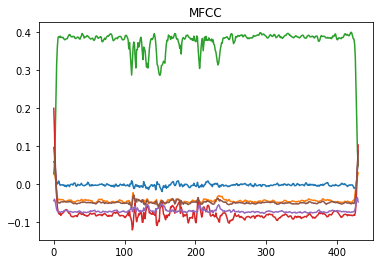

In [12]:
a.shape
plt.plot(e)
plt.title('MFCC')
plt.show() 

In [23]:
from sklearn import tree

In [111]:
features= np.empty((0,193))
for i in df['FileName']:
    mfccs, chroma, mel, contrast,tonnetz,length = extract_feature('/Users/shanraja/Desktop/projects/STT_Engine_Selection/audios/clear/test3_mic1/'+i)
    ext_features = np.hstack([mfccs,chroma,mel,contrast,tonnetz])
    features = np.vstack([features,ext_features])

/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/resampy/core.py:90: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(x.dtype, np.float):
/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1725: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(x.dtype, float) or np.issubdtype(x.dtype, complex):
/Users/shanraja/anaconda3/envs/dog-project/lib/python3.5/site-packages/librosa/util/utils.py:1640: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(dtype, float):
/Users/shanraja/anacon

In [24]:
fin_features.shape

(280, 194)

In [25]:
fin_labels[1]


array([0., 0., 0., 1., 0., 0., 0.])

In [415]:
labels=np.array(labels)
fin_labels.shape

(1178, 7)

In [46]:
from imblearn.over_sampling import SMOTE

In [49]:
train_test_split = np.random.rand(len(fin_features)) < 0.70
train_x = fin_features[train_test_split]
train_y = fin_labels[train_test_split]
test_x = fin_features[~train_test_split]
test_y = fin_labels[~train_test_split]

In [50]:
sm = SMOTE()
train_X,train_Y = sm.fit_sample(train_x, train_y)

ValueError: Expected n_neighbors <= n_samples,  but n_samples = 3, n_neighbors = 6

In [33]:
#from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
#from sklearn.ensemble import RandomForestClassifier

In [30]:
clf_rnd_frst = RandomForestClassifier(n_estimators=30, max_depth=100,random_state=0)
clf_rnd_frst.fit(train_x,train_y)

NameError: name 'RandomForestClassifier' is not defined

In [740]:
cross_val_score(clf, features, labels, cv=10)

array([0.25      , 0.17857143, 0.25      , 0.21428571, 0.07142857,
       0.21428571, 0.35714286, 0.32142857, 0.14814815, 0.14814815])

In [34]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_x, train_y)

In [35]:
predictions=clf.predict(test_x)
predictions


array([[0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
 

In [36]:
cross_val_score(clf, features, labels, cv=10).mean()

0.35714285714285715

In [744]:
cross_val_score(clf_rnd_frst, test_x, test_y, cv=10).mean()

0.07026315789473685

In [37]:
fin_features.shape

(280, 194)

In [38]:
fin_labels.shape[0]

280

In [39]:
from collections import Counter
count=[]
for i in range(fin_labels.shape[0]):
    count.append(fin_labels[i].argmax())
Counter(count)

Counter({0: 26, 1: 4, 2: 20, 3: 50, 4: 155, 5: 16, 6: 9})

In [40]:
# learning parameters
training_epochs = 5000
n_dim = fin_features.shape[1]
n_classes = fin_labels.shape[1]
n_hidden_units_one = 280 
n_hidden_units_two = 300
sd = 1 / np.sqrt(n_dim)
learning_rate = 0.0003

In [41]:
# Multilayer perceptron
X = tf.placeholder(tf.float32,[None,n_dim])
Y = tf.placeholder(tf.float32,[None,n_classes])

W_1 = tf.Variable(tf.random_normal([n_dim,n_hidden_units_one], mean = 0, stddev=sd))
b_1 = tf.Variable(tf.random_normal([n_hidden_units_one], mean = 0, stddev=sd))
h_1 = tf.nn.tanh(tf.matmul(X,W_1) + b_1)

W_2 = tf.Variable(tf.random_normal([n_hidden_units_one,n_hidden_units_two], 
mean = 0, stddev=sd))
b_2 = tf.Variable(tf.random_normal([n_hidden_units_two], mean = 0, stddev=sd))
h_2 = tf.nn.sigmoid(tf.matmul(h_1,W_2) + b_2)

W = tf.Variable(tf.random_normal([n_hidden_units_two,n_classes], mean = 0, stddev=sd))
b = tf.Variable(tf.random_normal([n_classes], mean = 0, stddev=sd))
y_ = tf.nn.softmax(tf.matmul(h_2,W) + b)

init = tf.global_variables_initializer()

In [42]:
# The cost function is assumed to cross-entropy
cost_function = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(y_), reduction_indices=[1])) 
#cost_function=tf.reduce_mean(tf.nn.weighted_cross_entropy_with_logits(Y,y_,0.9))
# Gradient Descent optimizer is used to reduce the loss function 
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)
#optimizer=tf.train.AdamOptimizer(learning_rate).minimize(cost_function)

correct_prediction = tf.equal(tf.argmax(y_,1), tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))



In [43]:

cost_history = np.empty(shape=[1],dtype=float)
y_true, y_pred = None, None
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(training_epochs):            
        _,cost = sess.run([optimizer,cost_function],feed_dict={X:train_x,Y:train_y})
        cost_history = np.append(cost_history,cost)
    
    y_pred = sess.run(tf.argmax(y_,1),feed_dict={X: test_x})
    y_true = sess.run(tf.argmax(test_y,1))

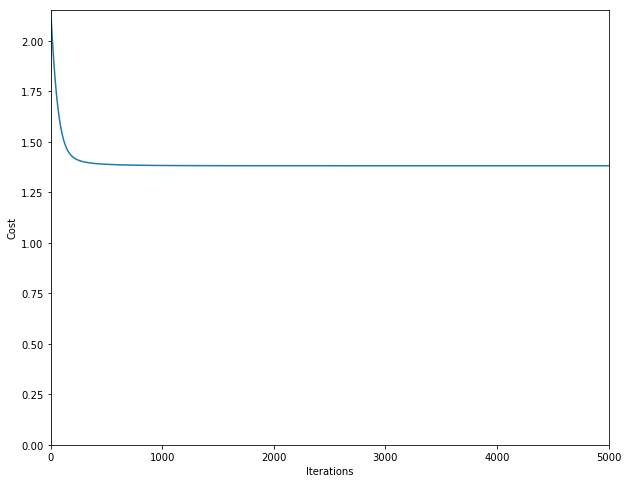

precision: 0.538
recall: 0.538
F-Score: 0.538
[3 4 4 4 4 3 2 5 5 0 4 4 0 3 4 2 4 4 3 3 2 0 5 4 5 4 4 4 0 4 3 4 0 4 3 0 4
 3 4 2 3 6 4 4 3 3 2 0 4 4 3 4 4 4 4 4 4 4 4 6 4 4 4 4 4 2 4 4 0 4 4 4 4 3
 0 4 3 4 3 5 2 3 3 0 4 4 4 4 5 4 4] [4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]


array([[ 0,  0,  0, 10,  0,  0],
       [ 0,  0,  0,  7,  0,  0],
       [ 0,  0,  0, 17,  0,  0],
       [ 0,  0,  0, 49,  0,  0],
       [ 0,  0,  0,  6,  0,  0],
       [ 0,  0,  0,  2,  0,  0]])

In [44]:


fig = plt.figure(figsize=(10,8))
plt.plot(cost_history)
plt.ylabel("Cost")
plt.xlabel("Iterations")
plt.axis([0,training_epochs,0,np.max(cost_history)])
plt.show()

p,r,f,s = precision_recall_fscore_support(y_true, y_pred, average='micro')
print ("precision:", round(p,3))
print ("recall:", round(r,3))
print ("F-Score:", round(f,3))
print(y_true,y_pred)
confusion_matrix(y_true,y_pred)